# **PyTorch tutorial**

In [1]:
from __future__ import print_function
import pickle as pkl
import torch 
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Tensors

* Its like a numpy ndarray 
* Doesn't know anything about deep learning or computational graphs or gradients
* **Also runs runs on GPU !**
* Can convert back and forth from the numpy array 

In [2]:
x = torch.Tensor(3, 4)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


What just happened? There's a nan.... 

We just declared an uninitialized tensor. The data inside is garbage, it is just random stuff that was in the memory.

In [3]:
#View the shape of a tensor
x.size()

torch.Size([3, 4])

In [4]:
#Declaring a random tensor of shape (2,3)
x = torch.rand(2, 3)
print(x)

tensor([[0.6358, 0.5989, 0.7771],
        [0.0673, 0.3642, 0.4303]])


In [5]:
#Declaring a custom tensor
#What's inside can be any python list or numpy array

x = torch.Tensor(
    [
        [0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6]
    ]
)
x

tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])

In [6]:
#Declaring an empty tensor and a tensor filled with 1s
zeros = torch.zeros(2,3)
print(zeros)

print()

ones = torch.ones(2,3)
print(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
#Changing elements of tensor
print(x)

x[1][1] = 24

print(x)

tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])
tensor([[ 0.1000,  0.2000,  0.3000],
        [ 0.4000, 24.0000,  0.6000]])


In [8]:
#Numpy indexing
#if we only want the second column
print(x)

print(x[:, 1])

tensor([[ 0.1000,  0.2000,  0.3000],
        [ 0.4000, 24.0000,  0.6000]])
tensor([ 0.2000, 24.0000])


In [9]:
#Reshaping
print(x)
print()
print(x.view(3,2))
print()

print(x.view(3,-1))
print()
#Give me 3 rows, you figure out the appropriate number of colomns. 
#Only one of the axis value can be -1 

tensor([[ 0.1000,  0.2000,  0.3000],
        [ 0.4000, 24.0000,  0.6000]])

tensor([[ 0.1000,  0.2000],
        [ 0.3000,  0.4000],
        [24.0000,  0.6000]])

tensor([[ 0.1000,  0.2000],
        [ 0.3000,  0.4000],
        [24.0000,  0.6000]])



### Tensors support most numpy operations like broadcasting, arithmetic, reshaping, indexing, etc.


In [10]:
x = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

y = torch.Tensor([[2]*3]*2)

print(f"x :\n{x}\n")
print(f"y :\n{y}")

x :
tensor([[1., 2., 3.],
        [4., 5., 6.]])

y :
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [11]:
x + y

tensor([[3., 4., 5.],
        [6., 7., 8.]])

In [12]:
x * y

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [13]:
x * 2

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [14]:
#Broadcasting
print(f"x :\n{x}\n")


z = torch.tensor([3.0 ,4.0]).view(-1,1)
print(f"z :\n{z}\n")

print(f"x * z :\n{x * z}\n")

x :
tensor([[1., 2., 3.],
        [4., 5., 6.]])

z :
tensor([[3.],
        [4.]])

x * z :
tensor([[ 3.,  6.,  9.],
        [16., 20., 24.]])



In [15]:
# move tensor to GPU using
x = x.cuda()
print(x)


# move back to CPU
x = x.cpu()
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]])


###Other Basic operations can be found here: https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/

###Autograd

Tensors can be initialized with an extra argument which lets them use autograd.

Autograd tracks the gradients for each computation of a tensor.

Some older PyTorch tutorials will use Variable to wrap a tensor to use autograd.

In [16]:
x = torch.tensor([2.0], requires_grad=True)
x


tensor([2.], requires_grad=True)

In [17]:
# x^3 = 9
output = x.pow(3)
output

tensor([8.], grad_fn=<PowBackward0>)

In [18]:
#Calling backward computes the derivative of whatever was calculated
output.backward()

In [19]:
#We can call tensor.grad to see the computed gradient.
#Example here, d/dx (x^3) = 3x^2, which is 3 * 2^2 = 12
x.grad

tensor([12.])

In [20]:
#Only Floating point tensors can use autograd
x = torch.tensor(
    [
        [1,2,3],
        [4,5,6]
    ]
,requires_grad = True
)

x + 3

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

### More elaborate example of gradient tracking

In [ ]:
#We declare two tensors, a and b
a = torch.tensor(
    [
        [1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0]
    ]
,requires_grad = True
)
a

In [ ]:
b = torch.tensor(
    [
        [2.0, 2.0],
        [2.0, 2.0],
        [2.0, 2.0]
    ]
,requires_grad = True
)
b

In [ ]:
# We perform a matrix multiplication of a and b
c = a.matmul(b)
c

In [ ]:
#We then multiply again, and perform a broadcast addition
d = (c.pow(2) + 5)
d

In [ ]:
# Take a mean
e = d.mean()
e

In [ ]:
#Compute gradients
e.backward()

In [ ]:
print(a.grad)
print(b.grad)
#print(d.grad)
#print(c.grad)

### Gradients are accumulated!

In [21]:
a = torch.eye(1, requires_grad=True)

b = a**2
c = a**3

print(f"a : {a}")
print(f"b : {b}")
print(f"c : {c}")

a : tensor([[1.]], requires_grad=True)
b : tensor([[1.]], grad_fn=<PowBackward0>)
c : tensor([[1.]], grad_fn=<PowBackward0>)


In [22]:
# Compute gradient after b, we get d/dx x^2 = 2x = 2
b.backward()
a.grad

tensor([[2.]])

In [23]:
# Compute gradient after c, we get d/dx x^3 = 3x^2 = 3
# a's gradient term will not be 3, because gradient accumulates. 2 + 3 = 5
c.backward()
a.grad

tensor([[5.]])

# Dynamic Computation Graphs

* PyTorch maintains a graph that records all of the operations performed on variables as you execute your operations.
* This results in a directed acyclic graph whose leaves are the input variables and roots are the output variables. 
* By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

![alt text](https://media.giphy.com/media/28g130aXBImNlG3dhG/giphy.gif)


## Modules

* Differentiable objects; may store state or learnable weights
* Can define a new module; it inputs and outputs Tensors and corresponding input and output functions


### torch.nn

Neural networks can be constructed using the **torch.nn** package. 

* Linear layers - nn.Linear, nn.Bilinear
* Convolution Layers - nn.Conv1d, nn.Conv2d, nn.Conv3d, nn.ConvTranspose2d
* Nonlinearities - nn.Sigmoid, nn.Tanh, nn.ReLU, nn.LeakyReLU
* Pooling Layers - nn.MaxPool1d, nn.AveragePool2d
* Recurrent Networks - nn.LSTM, nn.GRU
* Normalization - nn.BatchNorm2d
* Dropout - nn.Dropout, nn.Dropout2d
* Embedding - nn.Embedding
* Loss Functions - nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss


In [24]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        
        Args:
            - D_in : input dimension of the data
            - H : size of the first hidden layer
            - D_out : size of the output/ second layer
        """
        super(TwoLayerNet, self).__init__() # intialize recursively 
        self.linear1 = torch.nn.Linear(D_in, H) # create a linear layer 
        self.linear2 = torch.nn.Linear(H, D_out) 

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and
        return a tensor of output data. We can use 
        Modules defined in the constructor as well as arbitrary 
        operators on Variables.
        """
        h_relu = self.linear1(x)
        y_pred = self.linear2(h_relu)
        return y_pred
    

In [25]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.

N, D_in, H, D_out = 64, 1000, 100, 10

In [26]:
# Create random Tensors to hold inputs and outputs

x = torch.randn(N, D_in)
y = torch.randn(N, D_out, requires_grad=False)


In [27]:
# Construct our model by instantiating the class defined above

model = TwoLayerNet(D_in, H, D_out)


### Construct our loss function and an Optimizer. 

The call to **model.parameters()** in the SGD constructor will contain the learnable parameters of the two nn.Linear modules which are part of the model.

In [28]:
# loss function
criterion = torch.nn.MSELoss(reduction='sum')

# optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [29]:
losses = []

for epoch in range(50):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    losses.append(loss.data.item())
    print(f"Epoch : {epoch}    Loss : {loss.data.item()}")

    # Reset gradients to zero, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch : 0    Loss : 705.1826782226562
Epoch : 1    Loss : 602.975341796875
Epoch : 2    Loss : 518.596435546875
Epoch : 3    Loss : 447.64068603515625
Epoch : 4    Loss : 387.1727294921875
Epoch : 5    Loss : 335.1552429199219
Epoch : 6    Loss : 290.1211853027344
Epoch : 7    Loss : 250.97625732421875
Epoch : 8    Loss : 216.8766632080078
Epoch : 9    Loss : 187.1503143310547
Epoch : 10    Loss : 161.245849609375
Epoch : 11    Loss : 138.69873046875
Epoch : 12    Loss : 119.1087646484375
Epoch : 13    Loss : 102.12528991699219
Epoch : 14    Loss : 87.4371109008789
Epoch : 15    Loss : 74.7660903930664
Epoch : 16    Loss : 63.862674713134766
Epoch : 17    Loss : 54.50291061401367
Epoch : 18    Loss : 46.48621368408203
Epoch : 19    Loss : 39.633644104003906
Epoch : 20    Loss : 33.78636169433594
Epoch : 21    Loss : 28.80411720275879
Epoch : 22    Loss : 24.563812255859375
Epoch : 23    Loss : 20.958003997802734
Epoch : 24    Loss : 17.89341926574707
Epoch : 25    Loss : 15.28950977325

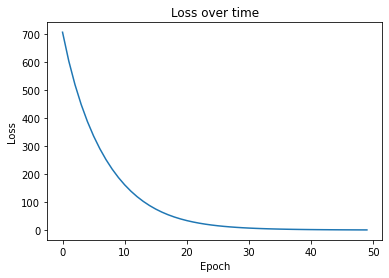

In [30]:
import matplotlib.pyplot as plt
plt.title('Loss over time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(losses)